In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import warnings
warnings.filterwarnings('ignore')

**Histogram Equalization** is a technique used to improve the contrast of an image by redistributing its pixel intensity values more evenly across the entire range (0–255).

In [24]:
def display_images(original_img, processed_img, original_title="Original Image", processed_title="Processed Image"):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.title(original_title)
    plt.imshow(original_img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(processed_title)
    plt.imshow(processed_img, cmap='gray')
    plt.axis('off')

    plt.show()

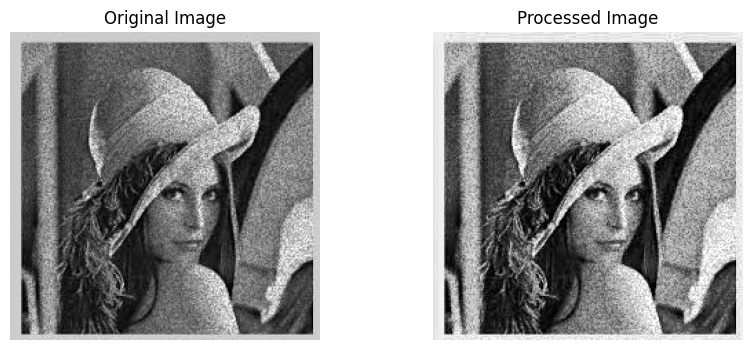

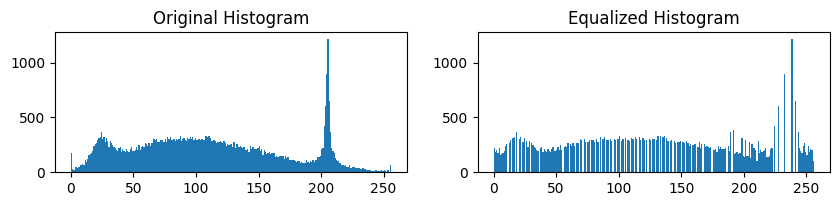

In [26]:
imagePath = '/content/image_.jpg'
img  = cv2.imread(imagePath,cv2.IMREAD_GRAYSCALE)
equalized = cv2.equalizeHist(img)

display_images(img, equalized)

plt.figure(figsize=(10, 4))
plt.subplot(2,2,3)
plt.title("Original Histogram")
plt.hist(img.ravel(), 256, [0,256])

plt.subplot(2,2,4)
plt.title("Equalized Histogram")
plt.hist(equalized.ravel(), 256, [0,256])
plt.show()


# ***Filtering in Spatial Domain***

| Filter Type | Filter Name | Noise Handled     | Nature     | Edge Preservation | Key Idea                      |
| ----------- | ----------- | ----------------- | ---------- | ----------------- | ----------------------------- |
| Linear      | Average     | Gaussian, Uniform | Linear     | Low               | Mean of neighbors             |
| Linear      | Circular    | Gaussian, Uniform | Linear     | Low               | Average in circular mask      |
| Linear      | Pyramid     | Gaussian          | Linear     | Medium            | Weighted mean (pyramid shape) |
| Linear      | Cone        | Gaussian          | Linear     | Medium            | Weighted mean (cone shape)    |
| Linear      | Gaussian    | Gaussian, Uniform | Linear     | High              | Gaussian-weighted mean        |
| Non-linear  | Median      | Salt & Pepper     | Non-linear | High              | Median of neighborhood        |
| Non-linear  | Kuwahara    | Gaussian, Speckle | Non-linear | Very High         | Least-variance region mean    |


# ***Average Filter (Mean Filter)***

**Concept:**

Each pixel is replaced by the average of its neighbors within an
𝑛
×
𝑛
window.

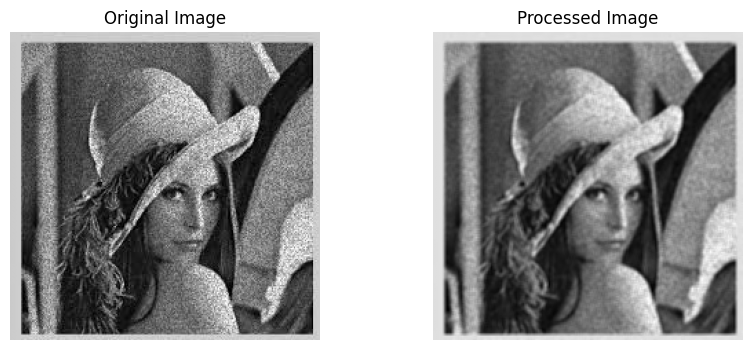

In [37]:
avg_filtered = cv2.blur(img, (3,3))
display_images(img, avg_filtered)

# ***Circular Filter***

**Concept:**

Similar to the average filter but uses a circular mask (only pixels inside a circle contribute to the average).

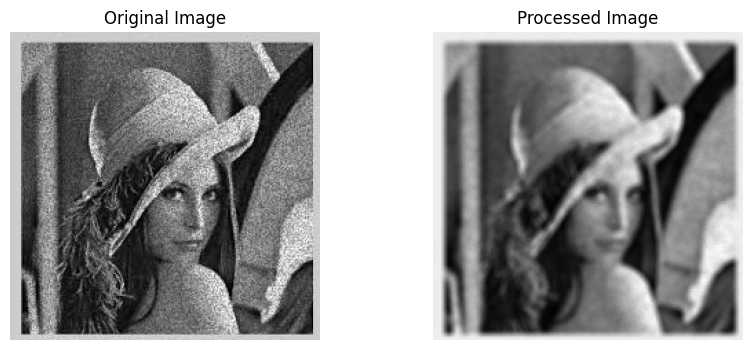

In [32]:
mask = np.zeros((7,7), np.uint8)
cv2.circle(mask, (3,3), 3, 1, -1)
circular_filtered = cv2.filter2D(img, -1, mask/np.sum(mask))
display_images(img, circular_filtered)

# ***Gaussian Filter***

**Concept:**

Each pixel’s contribution is weighted according to a Gaussian function — pixels closer to the center get more weight.

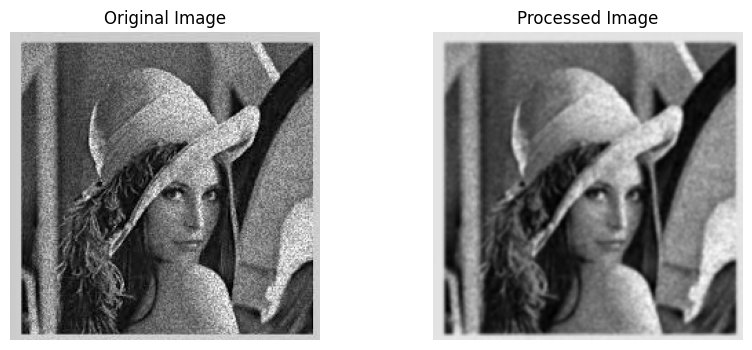

In [34]:
gaussian_filtered = cv2.GaussianBlur(img, (7,7), 1)
display_images(img, gaussian_filtered)

# ***Median Filter (Handle salt and papper noise)***

**Concept:**

Each pixel is replaced by the median value of its neighbors instead of the average.

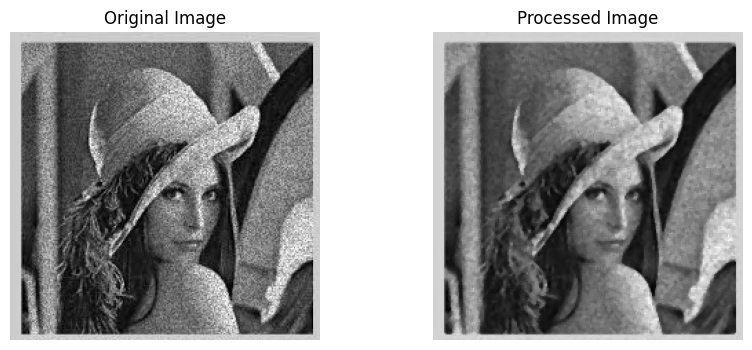

In [39]:
median_filtered = cv2.medianBlur(img, 3)
display_images(img, median_filtered)

# ***Image subtraction***

| Step | Operation                       | Description                                         |
| ---- | ------------------------------- | --------------------------------------------------- |
| 1    | Smooth image                    | Remove high-frequency content (Gaussian blur) |
| 2    | Subtract smoothed from original | Extract fine details                                |
| 3    | Add details to original         | Enhance sharpness                                   |


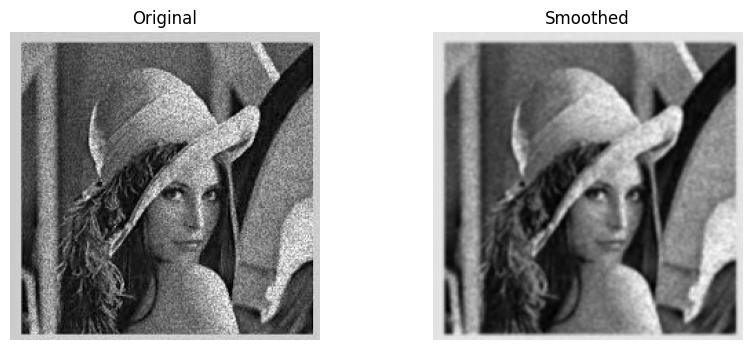

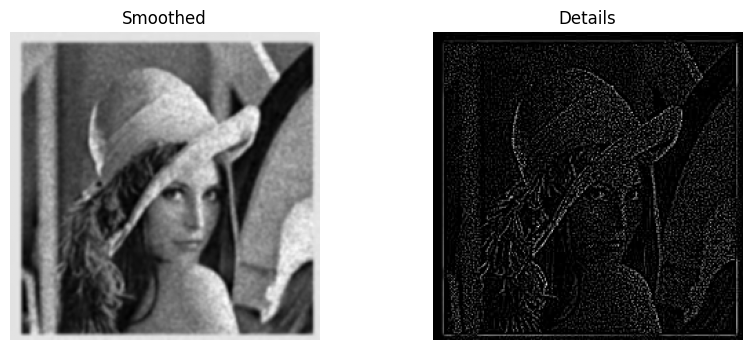

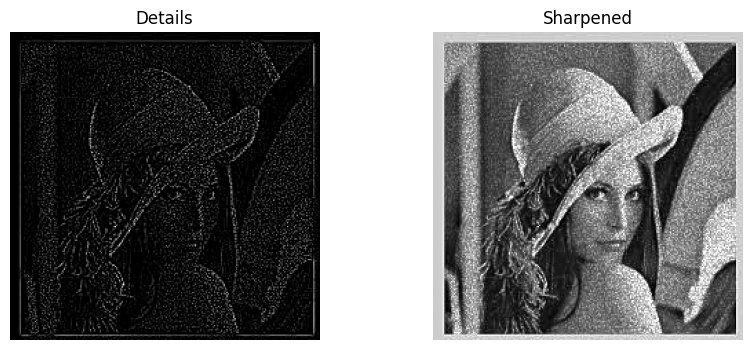

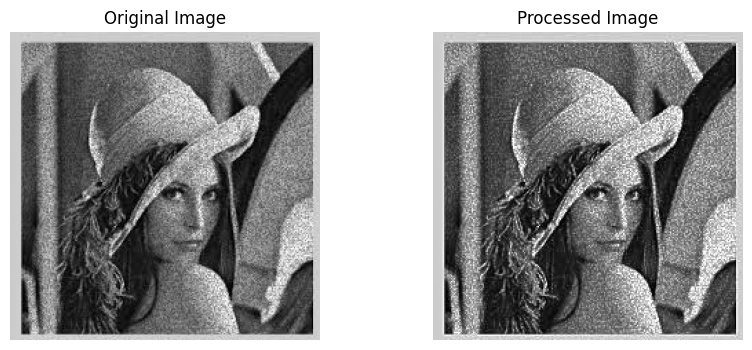

(None, None)

In [36]:
smoothed = cv2.GaussianBlur(img, (5,5), 1)
details = cv2.subtract(img, smoothed)

k = 1.0  # sharpening factor
sharpened = cv2.addWeighted(img, 1.0, details, k, 0)
display_images(img, smoothed,'Original','Smoothed') , display_images(smoothed,details,'Smoothed','Details'),
display_images(details, sharpened,'Details','Sharpened'), display_images(img, sharpened)